# MACHINE LEARNING

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imutils
import glob
import os
import sys
import time


## 1. Module Machine Learning
* https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_ml/py_table_of_contents_ml/py_table_of_contents_ml.html
* https://docs.opencv.org/4.x/dd/ded/group__ml.html#ga9c57a2b823008dda53d2c7f7059a8710
* cv2.ml_KNearest()
* cv2.ml_SVM()
* cv2.ml_Dtrees()
* cv2.ml_LogisticRegression()
* cv2.kmeans()

In [98]:
dig = cv2.imread('DATA/raw/digits.png')
gray = cv2.cvtColor(dig,cv2.COLOR_BGR2GRAY)

# Now we split the image to 5000 cells, each 20x20 size
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]

# Make it into a Numpy array. It size will be (50,100,20,20)
x = np.array(cells)

# Now we prepare train_data and test_data.
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)

# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()

# Initiate kNN, train the data, then test it with test data for k=1
knn = cv2.ml.KNearest_create()
knn.train(train,0,train_labels)
ret,result,neighbours,dist = knn.findNearest(test,k=5)

# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print(accuracy)

91.76


In [99]:
dig = cv2.imread('DATA/raw/digits.png')
gray = cv2.cvtColor(dig,cv2.COLOR_BGR2GRAY)

# Now we split the image to 5000 cells, each 20x20 size
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]

# Make it into a Numpy array. It size will be (50,100,20,20)
x = np.array(cells)

# Now we prepare train_data and test_data.
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)

# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()

# Train the SVM
svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, 100, 1e-6))
svm.train(train, cv2.ml.ROW_SAMPLE, train_labels)

_,result = svm.predict(test)

matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print(accuracy)

90.2


In [100]:
dig = cv2.imread('DATA/raw/digits.png')
gray = cv2.cvtColor(dig,cv2.COLOR_BGR2GRAY)

# Now we split the image to 5000 cells, each 20x20 size
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]

# Make it into a Numpy array. It size will be (50,100,20,20)
x = np.array(cells)

# Now we prepare train_data and test_data.
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)

# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()

dt = cv2.ml.DTrees_create()
dt.setMaxDepth(7)
dt.setCVFolds(1)
dt.train(train, cv2.ml.DTREES_PREDICT_AUTO, train_labels)

_, result = dt.predict(test)

matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print(accuracy)

71.08


## 2. PCA and SVD

In [13]:
def unFlatten(vector,rows, cols):
    img = []
    cutter = 0
    while(cutter+cols<=rows*cols):
        try:
            img.append(vector[cutter:cutter+cols])
        except:
            img = vector[cutter:cutter+cols]
        cutter+=cols
    img = np.array(img)
    return img

In [17]:
a = glob.glob('DATA/raw/face*')

In [20]:
a = ['DATA/raw/face_Denis_Mukwege.jpg','DATA/raw/face_Kevin.jpg','DATA/raw/face_Lily.jpg','DATA/raw/face_Nadia_Murad .jpg']

In [6]:
w=200
h=200
in_matrix = None
img = cv2.imread(a[0], cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img,(w,h))
vec = img_resized.reshape(w * h)
try:
	in_matrix = np.vstack((in_matrix, vec))
except:
	in_matrix = vec
if in_matrix is not None:
	mean, eigenvectors = cv2.PCACompute(in_matrix, np.mean(in_matrix, axis=0).reshape(1,-1))
	img = unFlatten(mean.transpose(), w, h) #Reconstruct mean to represent an image

C:\Users\admin\AppData\Local\Temp\ipykernel_33204\2318034345.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  img = np.array(img)


In [21]:
w=200
h=200
 
# Construct the input matrix
 
face=['Denis','Kevin','Lily','Nadia']

# for v in face:
# 	# in_matrix = None
# 	# imgcnt=0
for v,f in zip(face,a):
	# imgcnt+=1
	print(f)
	# Read the image in as a gray level image. 
	img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
	img_resized = cv2.resize(img,(w,h))
	# let's resize them to w * h 
	vec = img_resized.reshape(w * h)

	# stack them up to form the matrix
	try:
		in_matrix = np.vstack((in_matrix, vec))
	except:
		in_matrix = vec

	# PCA 
	if in_matrix is not None:
		mean, eigenvectors = cv2.PCACompute(in_matrix, np.mean(in_matrix, axis=0).reshape(1,-1))
	img = unFlatten(mean.transpose(), w, h) #Reconstruct mean to represent an image
	cv2.imwrite('DATA/raw/pca_face_'+v+'.png',img)

DATA/raw/face_Denis_Mukwege.jpg
DATA/raw/face_Kevin.jpg
DATA/raw/face_Lily.jpg
DATA/raw/face_Nadia_Murad .jpg


## 3. Module Deep Neural Network
* https://learnopencv.com/deep-learning-with-opencvs-dnn-module-a-definitive-guide/
* https://github.com/tensorflow/models/tree/master/research/object_detection/samples/configs
* https://github.com/opencv/opencv/blob/master/samples/dnn/tf_text_graph_common.py
* cv2.dnn.ClassificationModel()
* cv2.dnn.DetectionModel()
* cv2.dnn.SegmetaionModel()
* cv2.dnn.TextDetectionModel()
* cv2.dnn.TextRecognitionModel()
* cv2.dnn.blobFromImage()
* cv2.dnn.readNetFromTensorflow()
* cv2.dnn.readNetFromTorch()
* cv2.dnn.readNetFromCaffe()
* All of these above command use to read pretrain network for many purpose
* Use readNetFrom..... if you have a model from speicify framwork format, else use readNet....Model()
* Need to know the purpose of model before reading.

### 3.1 Classification Model

### 3.1.1 Caffe

In [101]:
# Split all the classes by a new line and store it in variable called rows.
with open('model/synset_words.txt') as f:
    rows = f.read().strip().split("\n")

# Check the number of classes.
print("Number of Classes "+str(len(rows)))

# Show the first 5 rows
print(rows[0:5])

Number of Classes 1000
['n01440764 tench, Tinca tinca', 'n01443537 goldfish, Carassius auratus', 'n01484850 great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 'n01491361 tiger shark, Galeocerdo cuvieri', 'n01494475 hammerhead, hammerhead shark']


In [102]:
# Split by comma after first space is found and grabb the first element and store it in a new list.
CLASSES = [r[r.find(" ") + 1:].split(",")[0] for r in rows]

# Print the first 20 processed class labels 
print(CLASSES[0:20])

['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee']


In [103]:
def init_classify_caffe(weights_name = 'DenseNet_121.caffemodel', architecture_name = 'DenseNet_121.prototxt.txt'):
    
    # Set global variables
    global classes
    
    base_path = 'model'
    
    # Read the Classes
    rows = open(os.path.join(base_path,'synset_words.txt')).read().strip().split("\n")

    # Load and split  the classes
    classes = [r[r.find(" ") + 1:].split(",")[0] for r in rows]
    
    # Load the wieght and architeture of the model
    weights = os.path.join(base_path, weights_name)
    architecture = os.path.join(base_path, architecture_name)
    
    # Intialize the model
    net = cv2.dnn.readNetFromCaffe(architecture, weights)
    return net

In [104]:
cf_net = init_classify_caffe()

In [105]:
image = cv2.imread('DATA/dnnimages/spcar.JPG')

In [106]:
blob = cv2.dnn.blobFromImage(image, 0.017, (224, 224), (103.94,116.78,123.68))

In [107]:
cf_net.setInput(blob)

In [108]:
Output_cf = cf_net.forward()

In [109]:
new_Output_cf = Output_cf.reshape(len(Output_cf[0][:]))

In [110]:
def classify_caffe(image, returndata=False, size=1,):
    
    # Pre-process the image
    blob = cv2.dnn.blobFromImage(image, 0.017, (224, 224), (103.94,116.78,123.68))
    
    # Input blob image into network
    cf_net.setInput(blob)
    
    # Forward pass
    Output = cf_net.forward()
    
    # Reshape the Output so its a single dimensional vector
    new_Output = Output.reshape(len(Output[0][:]))
    
    # Convert the scores to class probabilities between 0-1.
    expanded = np.exp(new_Output - np.max(new_Output))
    prob =  expanded / expanded.sum()
    print(prob.max())
    # Get Highest probable class.
    conf= np.max(prob)
    
    # Index of Class with the maximum Probability.
    index = np.argmax(prob)

    # Name of the Class with the maximum probability   
    label = classes[index]   

    text = "Label: {}, {:.2f}%".format(label, conf*100)

    cv2.putText(image, text, (5, size*26),  cv2.FONT_HERSHEY_COMPLEX, size, (100, 20, 255), 3)
        
    if  returndata:
        return image, text
 
    else:
        plt.figure(figsize=(10,10))
        plt.imshow(image[:,:,::-1]);plt.axis("off")
    return prob

0.74358267


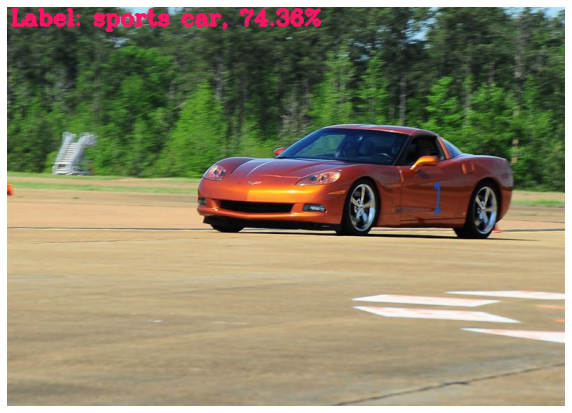

In [111]:
image = cv2.imread('DATA/dnnimages/spcar.JPG')
cf_prob = classify_caffe(image)

0.79237753


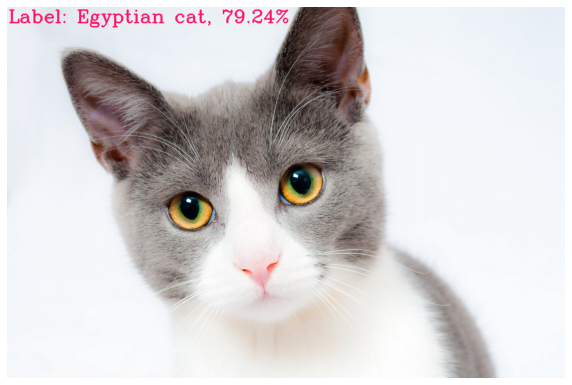

In [112]:
image = cv2.imread('DATA/dnnimages/cat.jpeg')
cf_prob = classify_caffe(image,size=2)

### 3.2.2 Tensorflow

In [113]:
tf_net = cv2.dnn.readNetFromTensorflow('model/DenseNet121.pb')

In [114]:
def classify_tf(image, returndata=False, size=1,net = tf_net):
    
    # Pre-process the image
    blob = cv2.dnn.blobFromImage(image, 0.017, (224, 224), (103.94,116.78,123.68))
    
    # Input blob image into network
    net.setInput(blob)
    
    # Forward pass
    Output = net.forward()
    
    # Reshape the Output so its a single dimensional vector
    new_Output = Output[0]
    
    # Convert the scores to class probabilities between 0-1.
    
    prob =  new_Output
    
    # Get Highest probable class.
    conf= np.max(prob)
    
    # Index of Class with the maximum Probability.
    index = np.argmax(prob)

    # Name of the Class with the maximum probability   
    label = classes[index]   

    text = "Label: {}, {:.2f}%".format(label, conf*100)

    cv2.putText(image, text, (5, size*26),  cv2.FONT_HERSHEY_COMPLEX, size, (100, 20, 255), 3)
        
    if  returndata:
        return image, text
 
    else:
        plt.figure(figsize=(10,10))
        plt.imshow(image[:,:,::-1]);plt.axis("off")
    

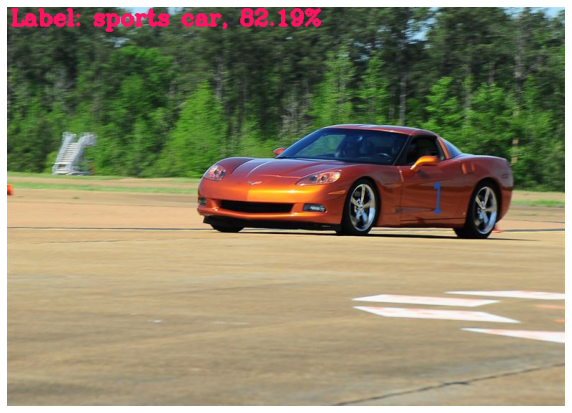

In [115]:
image = cv2.imread('DATA/dnnimages/spcar.JPG')
classify_tf(image)

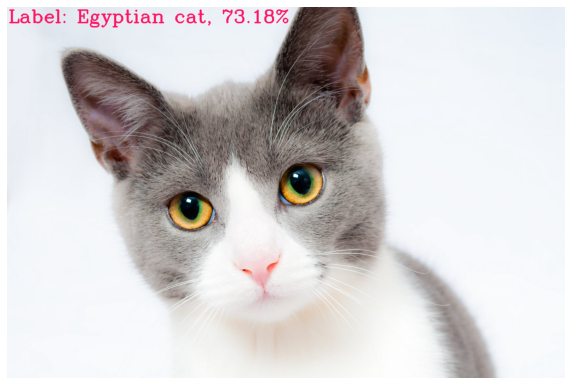

In [116]:
image = cv2.imread('DATA/dnnimages/cat.jpeg')
classify_tf(image,size=2)

### 3.1.3: Pytorch

In [117]:
toc_net = cv2.dnn.readNetFromONNX('model/DenseNet121.onnx')

In [118]:
def classify_toc(image, returndata=False, size=1,net = toc_net):
    
    # Pre-process the image
    blob = cv2.dnn.blobFromImage(image, 0.017, (224, 224), (103.94,116.78,123.68))
    
    # Input blob image into network
    net.setInput(blob)
    
    # Forward pass
    Output = net.forward()
    
    # Reshape the Output so its a single dimensional vector
    new_Output = Output[0]
    
    # Convert the scores to class probabilities between 0-1.
    expanded = np.exp(new_Output - np.max(new_Output))
    prob =  expanded / expanded.sum()
    
    
    # Get Highest probable class.
    conf= np.max(prob)
    
    # Index of Class with the maximum Probability.
    index = np.argmax(prob)

    # Name of the Class with the maximum probability   
    label = classes[index]   

    text = "Label: {}, {:.2f}%".format(label, conf*100)

    cv2.putText(image, text, (5, size*26),  cv2.FONT_HERSHEY_COMPLEX, size, (100, 20, 255), 3)
        
    if  returndata:
        return image, text
 
    else:
        plt.figure(figsize=(10,10))
        plt.imshow(image[:,:,::-1]);plt.axis("off")

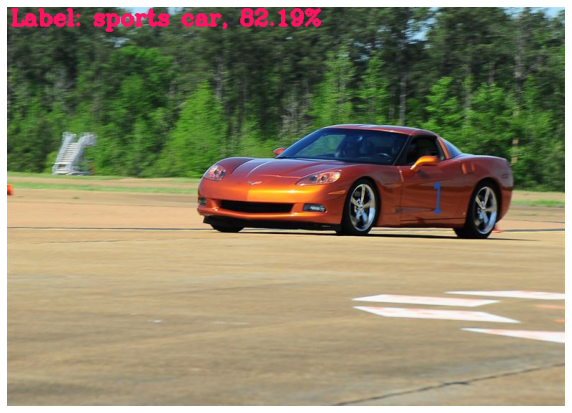

In [119]:
image = cv2.imread('DATA/dnnimages/spcar.JPG')
classify_toc(image)

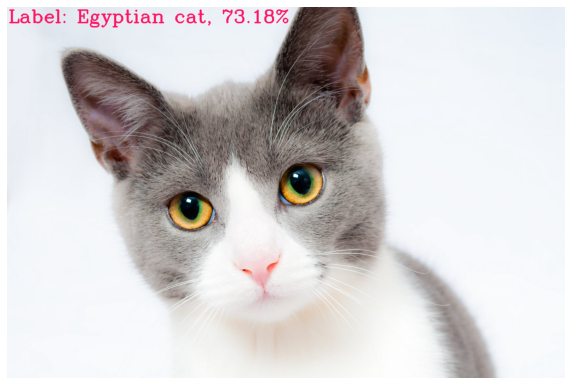

In [120]:
image = cv2.imread('DATA/dnnimages/cat.jpeg')
classify_toc(image,size=2)

### 3.2 Text Dectection and Recognition
* https://drive.google.com/drive/folders/1cTbQ3nuZG-EKWak6emD_s8_hHXWz7lAr
* https://docs.opencv.org/4.x/d4/d43/tutorial_dnn_text_spotting.html
* cv2.dnn_TextDetectionModel_DB()
* cv2.dnn_TextRecognitionModel()


#### 3.2.1.1 : Text Detection

In [121]:
model_text_det = cv2.dnn_TextDetectionModel_DB('model/DB_IC15_resnet50.onnx')

In [122]:
model_text_det.setInputScale(1./255.)
model_text_det.setInputSize(736,736)


<dnn_Model 000001C2D97CE5D0>

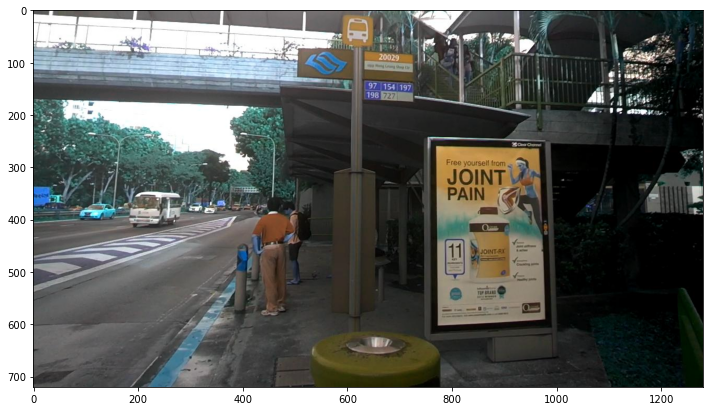

In [123]:
image = cv2.imread('DATA/raw/textdet1.jpg')
plt.figure(figsize=(12,8))
plt.imshow(image)

In [124]:
detection,confidence = model_text_det.detect(image)

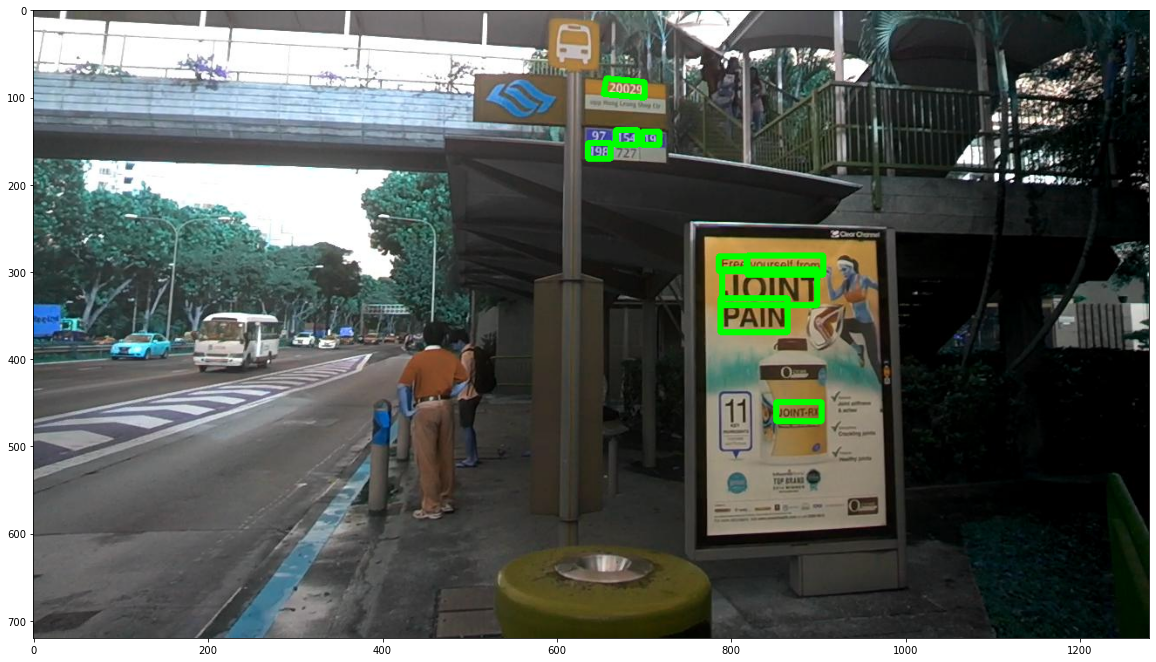

In [125]:
for i in range(len(detection)):
    vertices = np.array([list(detection[i][0]),list(detection[i][1]),list(detection[i][2]),list(detection[i][3])],dtype=np.int32)
    pts = vertices.reshape((-1,1,2)) 
    cv2.polylines(image,[pts],isClosed=True,color=(0,255,0),thickness=5)
plt.figure(figsize=(20,12))
plt.imshow(image)


#### 3.2.1.2: Text Recognition

In [126]:
model_text_rec = cv2.dnn_TextRecognitionModel('model/crnn_cs.onnx')

In [127]:
model_text_rec.setInputScale(1./127.5)
model_text_rec.setDecodeType('CTC-greedy')
model_text_rec.setInputMean(127.5)
model_text_rec.setInputSize(100,32)

<dnn_Model 000001C2937C2930>

In [128]:
with open('model/alphabet_94.txt','r') as file:
    vocab = []
    for line in file.readlines():
        vocab.append(line[0])



In [129]:
model_text_rec.setVocabulary(vocab)

<dnn_TextRecognitionModel 000001C2A8431F50>

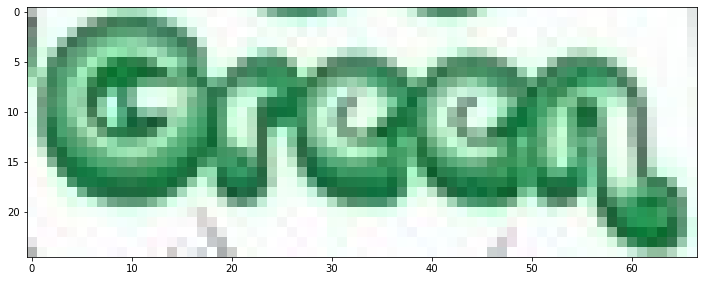

In [130]:
image = cv2.imread('DATA/raw/text_rec3.png')
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [131]:
model_text_rec.recognize(image)

'Green'

#### 3.2.1.3: OCR
* Output of detection become input of recognition

In [132]:
image = cv2.imread('DATA/raw/textdet2.jpg')
copy_img = image.copy()
detection,confidence = model_text_det.detect(copy_img)

In [133]:
detection[0][:,1].max()

493

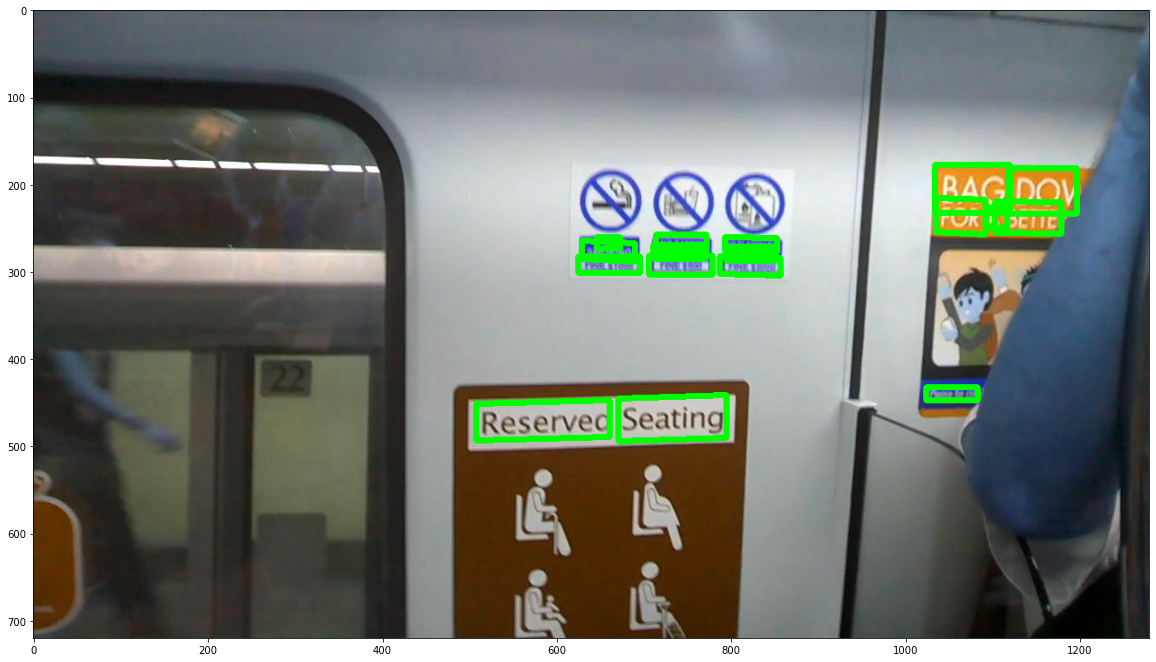

In [134]:
for i in range(len(detection)):
    vertices = np.array([list(detection[i][0]),list(detection[i][1]),list(detection[i][2]),list(detection[i][3])],dtype=np.int32)
    pts = vertices.reshape((-1,1,2)) 
    cv2.polylines(copy_img,[pts],isClosed=True,color=(0,255,0),thickness=5)
plt.figure(figsize=(20,12))
plt.imshow(copy_img)

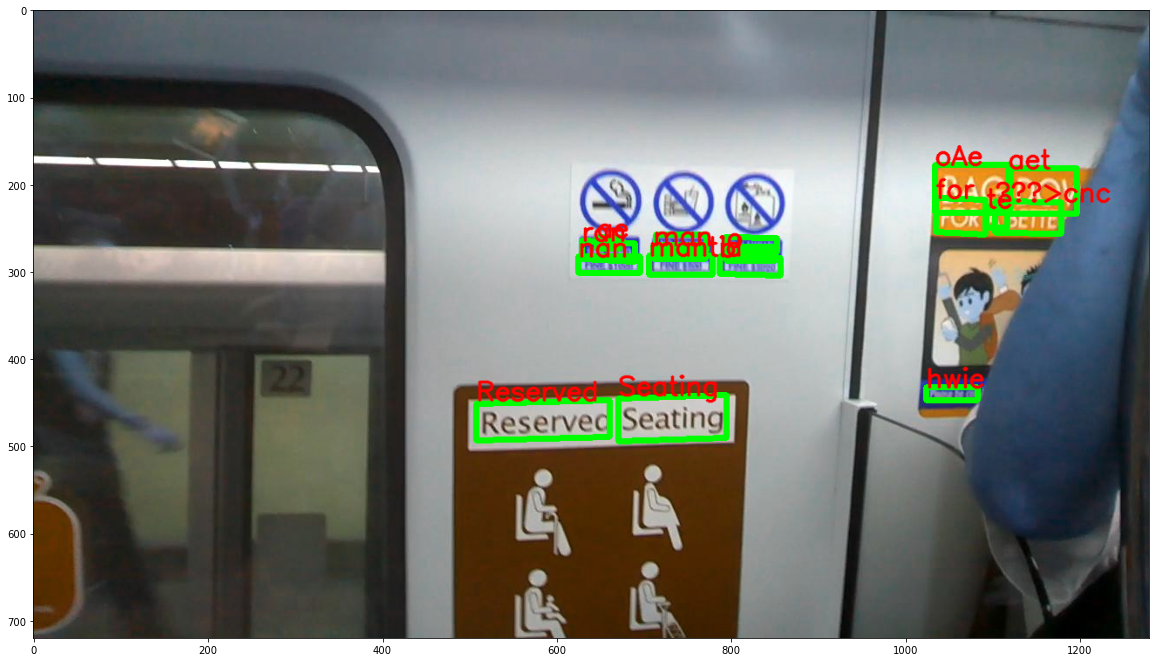

In [135]:
for i in range(len(detection)):
    crop_img = copy_img[detection[i][:,1].min():detection[i][:,1].max(),detection[i][:,0].min():detection[i][:,0].max(),:]
    text = model_text_rec.recognize(crop_img)
    cv2.putText(copy_img,text=text,org=(detection[i][:,0].min(),detection[i][:,1].min()),fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=1,thickness=2,color=(255,0,0),lineType=cv2.LINE_AA)

plt.figure(figsize=(20,12))
plt.imshow(copy_img)

### 3.3 : Detection Model
* https://www.youtube.com/watch?v=HXDD7-EnGBY


In [136]:
model_det = cv2.dnn_DetectionModel('model/frozen_inference_graph.pb','model/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt')

In [137]:
model_det.setInputSize(320,320)
model_det.setInputScale(1.0/127.5)
model_det.setInputMean((127.5,127.5,127.5))
model_det.setInputSwapRB(True)

<dnn_Model 000001C2A991AA10>

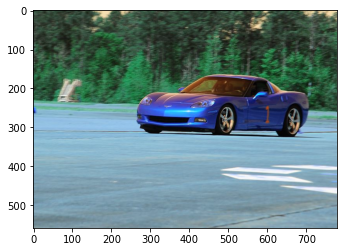

In [138]:
image = cv2.imread('DATA/dnnimages/spcar.JPG')
plt.imshow(image)
classIds, confs, bbox = model_det.detect(image,confThreshold=0.45)


In [139]:
classNames= []
classFile = 'model/coco.names'
with open(classFile,'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')

In [140]:

if len(classIds) != 0:
    for classId, confidence,box in zip(classIds.flatten(),confs.flatten(),bbox):
        cv2.rectangle(image,box,color=(0,255,0),thickness=2)
        cv2.putText(image,classNames[classId-1].upper(),(box[0]+10,box[1]+30),
        cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
        cv2.putText(image,str(round(confidence*100,2)),(box[0]+200,box[1]+30),
        cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)


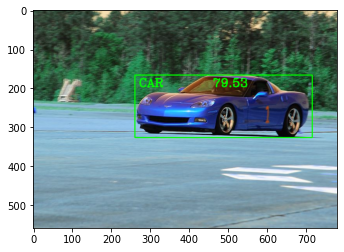

In [141]:
plt.imshow(image)

### 3.4 Segementation Model
* https://www.youtube.com/watch?v=8m8m4oWsp8M

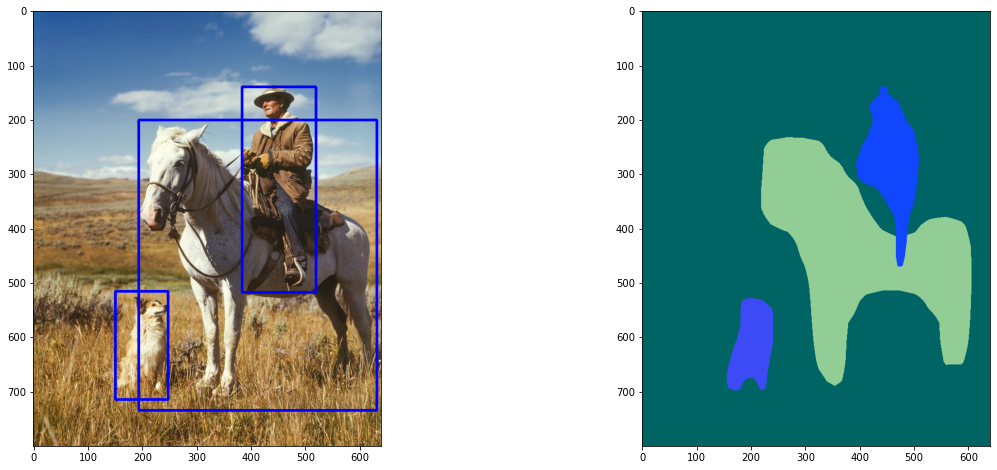

In [142]:
# Loading Mask RCNN
net = cv2.dnn.readNetFromTensorflow("model/frozen_inference_graph_coco.pb",
									"model/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt")

# Generate random colors
colors = np.random.randint(0, 255, (80, 3))

# print(colors)

# Load image
img = cv2.imread("DATA/raw/horse.jpg")
height, width, _ = img.shape

# Create black image
black_image = np.zeros((height, width, 3), np.uint8)
black_image[:] = (100, 100, 0)

# Detect objects
blob = cv2.dnn.blobFromImage(img, swapRB=True)
net.setInput(blob)

boxes, masks = net.forward(["detection_out_final", "detection_masks"])
detection_count = boxes.shape[2]

for i in range(detection_count):
	box = boxes[0, 0, i]
	class_id = box[1]
	score = box[2]
	if score < 0.5:
		continue

	# Get box Coordinates
	x = int(box[3] * width)
	y = int(box[4] * height)
	x2 = int(box[5] * width)
	y2 = int(box[6] * height)

	roi = black_image[y: y2, x: x2]
	roi_height, roi_width, _ = roi.shape

	# Get the mask
	mask = masks[i, int(class_id)]
	mask = cv2.resize(mask, (roi_width, roi_height))
	_, mask = cv2.threshold(mask, 0.5, 255, cv2.THRESH_BINARY)

	cv2.rectangle(img, (x, y), (x2, y2), (255, 0, 0), 3)

	# Get mask coordinates
	contours, _ = cv2.findContours(np.array(mask, np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	color = colors[int(class_id)]
	for cnt in contours:
		cv2.fillPoly(roi, [cnt], (int(color[0]), int(color[1]), int(color[2])))

	# cv2.imshow("roi", roi)
	# cv2.waitKey(0)

fig, ax = plt.subplots(1,2,figsize = (20,8))
ax[0].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(black_image,cv2.COLOR_BGR2RGB))